# Импорты

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('dark_background')

# Предобработка

In [3]:
df = pd.read_csv('data/clean_data.csv')
df.head(3)

,date,accuracy_1_%,accuracy_2_%,accuracy_3_%,accuracy_all_%,accuracy_1_avg,accuracy_2_avg,accuracy_3_avg,accuracy_all_avg,year,month,day,weekday,requests_per_report_1,requests_per_report_2,requests_per_report_3,requests_per_report_all
0,2024-07-01,27.5,38.8,5.4,49.6,1.321,1.523,1.185,2.052,2024,7,1,0,4.803636,3.925258,21.944444,4.137097
1,2024-07-02,26.8,38.9,5.7,49.5,1.333,1.511,1.200,2.048,2024,7,2,1,4.973881,3.884319,21.052632,4.137374
2,2024-07-03,26.0,38.0,6.0,48.6,1.303,1.508,1.201,2.025,2024,7,3,2,5.011538,3.968421,20.016667,4.166667


In [4]:
df.columns

Index(['date', 'accuracy_1_%', 'accuracy_2_%', 'accuracy_3_%',
       'accuracy_all_%', 'accuracy_1_avg', 'accuracy_2_avg', 'accuracy_3_avg',
       'accuracy_all_avg', 'year', 'month', 'day', 'weekday',
       'requests_per_report_1', 'requests_per_report_2',
       'requests_per_report_3', 'requests_per_report_all'],
      dtype='object')

1) валидна ли приписка (только для отчетов с данными из источника n) для первых трех колонок

2) есть ли данный инструмент на дроме сейчас, (какие опции выбора есть у юзера, за что платит юзер) и если нет, то есть ли доп инфа о функционале инструмента

In [5]:
for _ in [1, 2, 3, 'all']:
    df[f'requests_per_report_{_}'] = 100 * df[f'accuracy_{_}_avg'] / df[f'accuracy_{_}_%']

In [6]:
N = 1000

In [7]:
df['cost_1'] = df['cost_1'] = df.apply(lambda row: row['accuracy_1_avg'] * 4 if row['year'] == 2024 else row['accuracy_1_avg'] * 7.5, axis=1)

df['cost_2'] = [350_000 / (30 * N)] * len(df)

df['cost_3'] = 0.5 * df['requests_per_report_3']

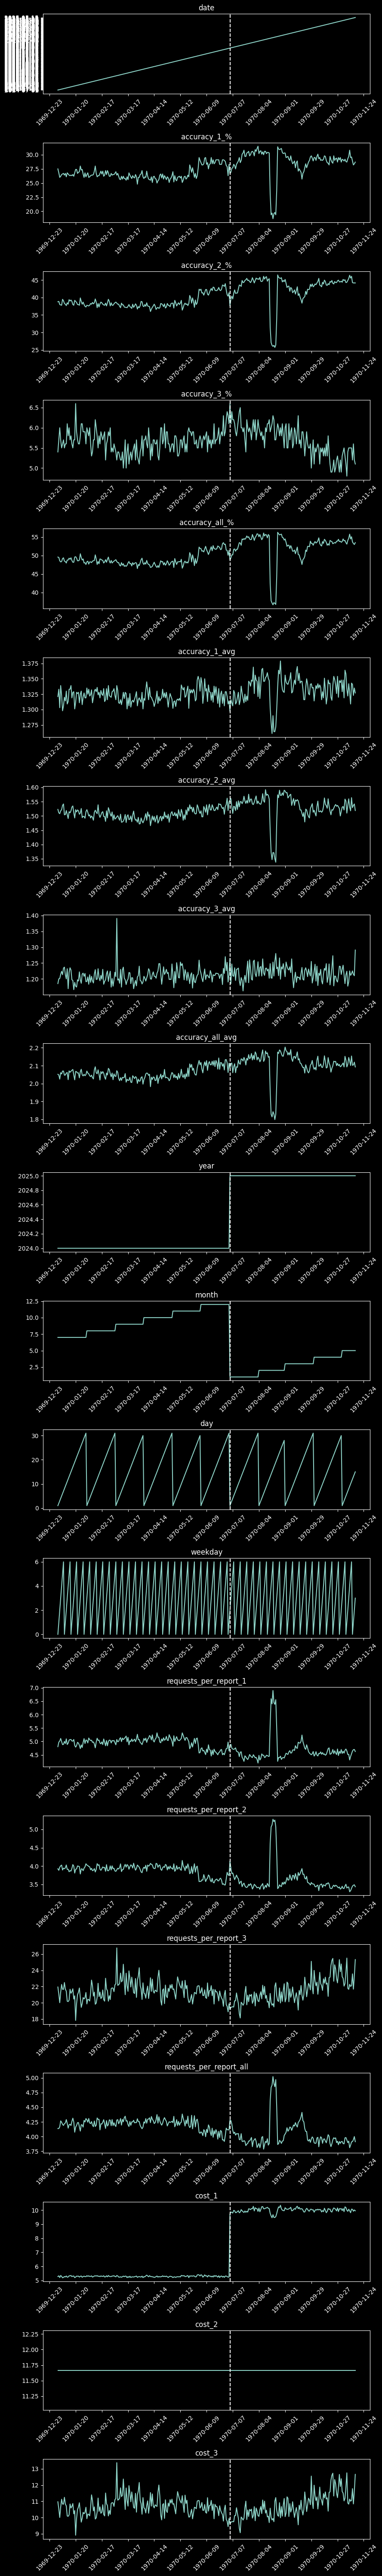

In [8]:
plt.figure(figsize=(9, 3 * len(df.columns)))

for idx, col in enumerate(df.columns):
    ax = plt.subplot(len(df.columns), 1, idx + 1)
    plt.plot(df.date, df[col])
    plt.title(col)
    plt.axvline(df.date[184], linestyle='--', color='white')
    
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4)) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [9]:
df[[f'cost_{_}' for _ in range(1, 4)]].mean()

cost_1     7.283191
cost_2    11.666667
cost_3    10.735876
dtype: float64

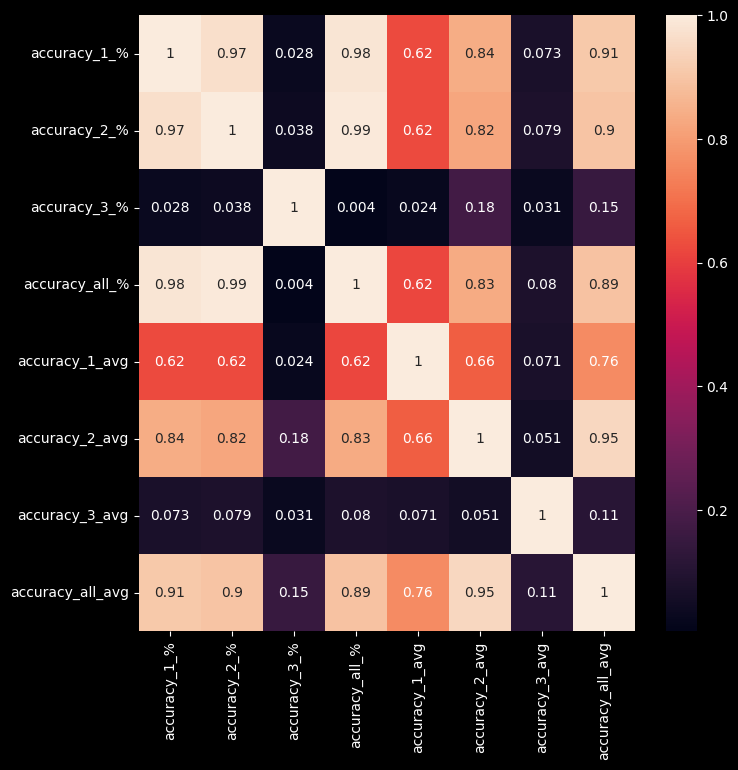

In [10]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 8))
sns.heatmap(np.abs(df[['accuracy_1_%', 'accuracy_2_%', 'accuracy_3_%', 'accuracy_all_%', 
              'accuracy_1_avg', 'accuracy_2_avg', 'accuracy_3_avg', 'accuracy_all_avg']].corr()), annot=True)
plt.show()

In [11]:
df.describe()

,accuracy_1_%,accuracy_2_%,accuracy_3_%,accuracy_all_%,accuracy_1_avg,accuracy_2_avg,accuracy_3_avg,accuracy_all_avg,year,month,day,weekday,requests_per_report_1,requests_per_report_2,requests_per_report_3,requests_per_report_all,cost_1,cost_2,cost_3
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,3.190000e+02,319.000000
mean,27.590909,40.479937,5.671473,50.447335,1.327078,1.517959,1.213752,2.079505,2024.423197,6.652038,15.351097,2.981191,4.835319,3.776404,21.471753,4.134157,7.283191,1.166667e+01,10.735876
std,2.020931,3.621551,0.325685,3.346863,0.016873,0.034673,0.024331,0.058997,0.494842,3.672255,8.802636,2.001483,0.356395,0.302982,1.319628,0.188733,2.333066,1.779148e-15,0.659814
min,18.700000,25.700000,4.800000,36.700000,1.261000,1.338000,1.162000,1.799000,2024.000000,1.000000,1.000000,0.000000,4.193651,3.299569,17.833333,3.786096,5.192000,1.166667e+01,8.916667
25%,26.200000,38.000000,5.500000,48.200000,1.316000,1.500000,1.197000,2.044000,2024.000000,3.000000,8.000000,1.000000,4.567504,3.510751,20.542373,3.972722,5.280000,1.166667e+01,10.271186
50%,27.400000,39.700000,5.700000,49.700000,1.327000,1.518000,1.211000,2.079000,2024.000000,7.000000,15.000000,3.000000,4.846715,3.819588,21.368421,4.163934,5.336000,1.166667e+01,10.684211
75%,29.100000,43.750000,5.900000,53.300000,1.338000,1.539000,1.228500,2.119000,2025.000000,10.000000,23.000000,5.000000,5.038241,3.952877,22.153021,4.249740,9.978750,1.166667e+01,11.076511
max,31.500000,46.500000,6.600000,56.300000,1.379000,1.592000,1.391000,2.204000,2025.000000,12.000000,31.000000,6.000000,6.898396,5.276923,26.750000,5.021798,10.342500,1.166667e+01,13.375000


In [13]:
import ruptures as rpt

**ruptures**

Бибилиотека для анализа временных рядов, а конкретнее, для *changepoint detection* 
(Поиска точек, где структура данных резко меняется)

**Pelt (Pruned Exact Linear Time)**

Алгоритм для точного поиска таких точек

Используем модель радиально базисных функций (rbf), так как данные не факт, что линейные

**Гиперпараметры (интересные нам)**

- *min_size* - минимальное расстояние между точками
- *pen (penalty)* - штраф / параметр регуляризации
  - больше pen -> ищет более сильные изменения -> мешьше точек

In [25]:
signal = df['accuracy_1_%'].values

In [168]:
model = rpt.Pelt(model="rbf", min_size=5).fit(signal)
changes_pelt = model.predict(pen=1)

model = rpt.Binseg(model="rbf", min_size=5).fit(signal)
changes_binseg = model.predict(n_bkps=10)

model = rpt.KernelCPD(kernel="rbf", min_size=5).fit(signal)
changes_kernelcpd = model.predict(n_bkps=10)

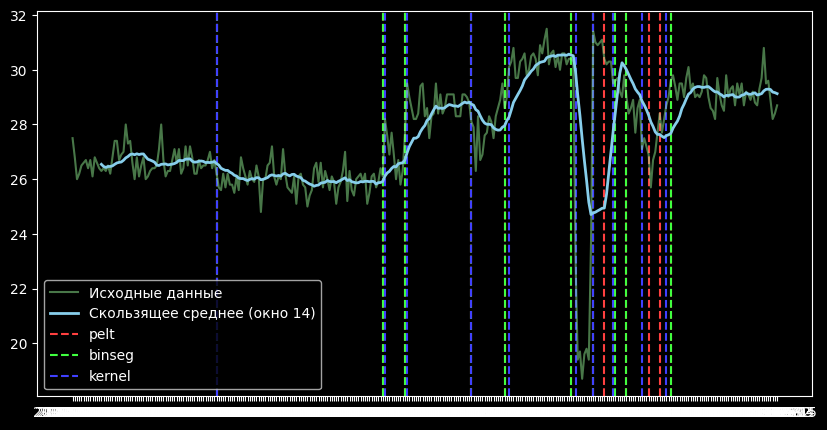

In [163]:


# # Визуализация
# plt.figure(figsize=(10, 5))
# plt.plot(df['date'], df['accuracy_1_%'], alpha=0.5, color='lightgreen', label='Исходные данные', zorder=2)

# for window_size in [14]:
#     df['smoothed'] = df['accuracy_1_%'].rolling(window=window_size).mean()
#     plt.plot(df['date'], df['smoothed'], linewidth=2, color='skyblue', 
#             label=f'Скользящее среднее (окно {window_size})', zorder=3)

# changepoints = [changes_pelt, changes_binseg, changes_kernelcpd]
# colors = [hsv2rgb(i / len(changepoints), 0.75, 1) for i in range(len(changepoints))]
# labels = ["pelt", "binseg", "kernel"]

# for i in range(len(changepoints)):

#     changepoints[i] = [cp for cp in changepoints[i] if cp < len(df)]
#     color = colors[i]

#     for cp in changepoints[i]:
#         plt.axvline(df['date'].iloc[cp], color=color, 
#                     linestyle='--', zorder=1, 
#                     label=labels[i] if cp == changepoints[i][0] else "")

#     # plt.show()
#     # plt.show()

#     # print(f"Найдено раундов улучшений: {len(changepoints[i])}")
#     # print("Даты изменений:", df['date'].iloc[changepoints[i]].values)

# plt.legend()

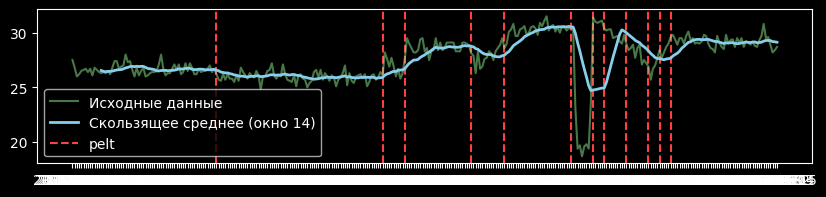

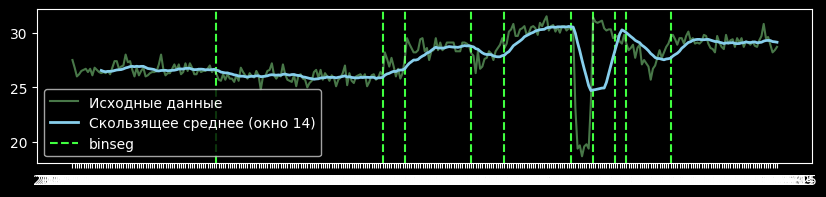

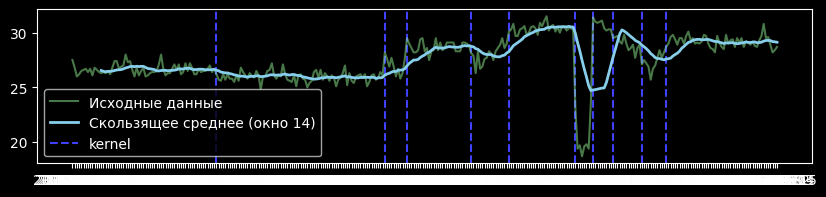

In [ ]:
from colorsys import hsv_to_rgb as hsv2rgb

changepoints = [changes_pelt, changes_binseg, changes_kernelcpd]
labels = ["pelt", "binseg", "kernel"]

colors = [hsv2rgb(i / len(changepoints), 0.75, 1) for i in range(len(changepoints))]


for i in range(len(changepoints)):

    plt.figure(figsize=(10, 2))
    plt.plot(df['date'], df['accuracy_1_%'], alpha=0.5, color='lightgreen', label='Исходные данные', zorder=2)

    for window_size in [14]:
        df['smoothed'] = df['accuracy_1_%'].rolling(window=window_size).mean()
        plt.plot(df['date'], df['smoothed'], linewidth=2, color='skyblue', 
                label=f'Скользящее среднее (окно {window_size})', zorder=3)

    changepoints[i] = [cp for cp in changepoints[i] if cp < len(df)]
    color = colors[i]

    for cp in changepoints[i]:
        plt.axvline(df['date'].iloc[cp], color=color, 
                    linestyle='--', zorder=1, 
                    label=labels[i] if cp == changepoints[i][0] else "")
    
    plt.legend()

    # plt.show()
    # plt.show()

    # print(f"Найдено раундов улучшений: {len(changepoints[i])}")
    # print("Даты изменений:", df['date'].iloc[changepoints[i]].values)
